# Peer-graded Assignment: Центральная предельная теорема своими руками


В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?




*Review criterialess*

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.


## 1.  Гамма-распределение


Будем рассматривать гамма-распределение случайной c $\alpha = 2$ и с $\beta=2$. Плотность вероятности для гамма распределения будет иметь следующий вид:
$
f_{X}(x)=\left\{{\begin{matrix}x^{{α-1}}{\frac  {e^{{-x/\beta }}}{\beta ^{α}\,\Gamma (α)}},&x\geq 0\\0,&x<0\end{matrix}}\right., где \ Г \ гамма-функция\ Эйлера.
$

Этой функцией плотности вероятности часто можно описать спрос на сезонные товары в интернет-магазине, например на новогодние украшения или на новый iphone после выпуска новой модели.



Сгенерируем из распределения выборку из 1000 элементов и сравним гистограмму полученной выборки с теоретической плотностью распределения случайной величины.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss # из scipy импортируем модуль со статистикой

# для вывода графиков внутри блокнота
%matplotlib inline 

In [2]:
# генерация выборки из 1000 элементов для гамма распределения
size = 1000
alpha, loc, beta=2, 0, 2 
data=ss.gamma.rvs(alpha,loc=loc,scale=beta,size=size)

In [159]:
# теоритеческая плотность вероятности (pdf - probability density function) для распределения
rv = ss.gamma(alpha,loc,beta)
x = np.linspace(0,20) 
pdf = rv.pdf(x) 

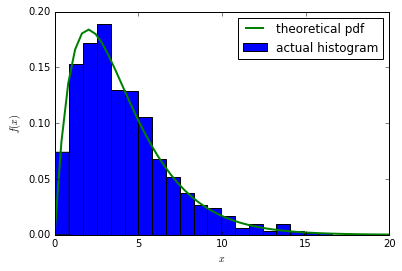

In [165]:
# Построим гистограмму гамма-распределения и наложим на нее график теоритической плотности вероятности

plt.hist(data, 20, normed=True, label="actual histogram", color="blue")
plt.plot(x, pdf, linewidth=2, label="theoretical pdf", color="green")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()


### Вывод
В целом гистограмма выборки совпадает с теоретической оценкой плотности вероятности гамма-распределения. 
Но видно, что на нашей выборке присутствует много аутлаеров. 
При увеличении выборки в 10 раз, выбросов станет заметно меньше, и гистаграмма полностью совпадет с теоретической оценкой.


## 2. Оценка распределения выборочного среднего случайной величины гамма-распределения при разных объёмах выборки

Из свойств гамма-распределения

$
 Математическое ожидание = \alpha*\beta=4 \ для \ рассматриваемого \ случая
$

$
 Дисперсия = \alpha*\beta^2=6 \ для \ рассматриваемого \ случая
$

Распределение выборочных средних гамма распределения с $\alpha = 2$ и с $\beta=2$ будет приближаться нормальным распределением $N(\mu = 4, \sigma^2 = \frac{6}{n})$.

In [166]:

size =1000 # выборка по условию

# введем функцию, которая для заданного n объема выборки строит график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних


def gen_pdf(n): 
    # генерируем выборочные средние по выборке n
    means_arr = []
    for i in range(size):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means_arr.append(sample_mean)
    
    #теоритеческая плотность вероятности (pdf - probability density function) нормального распределения
    mu = 4 # наше мат ожидание
    sigma = (6./n) ** 0.5 # теоритическое стандартное отклонение
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,10,100)
    pdf = norm_rv.pdf(x)
    
    # гистограмма выборочных средних с наложением на теоретической плотности вероятности 
    # оценка плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5, label="theoretical pdf")
    plt.hist(means_arr, normed = True, label="actual histogram")
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.legend()
    plt.show()


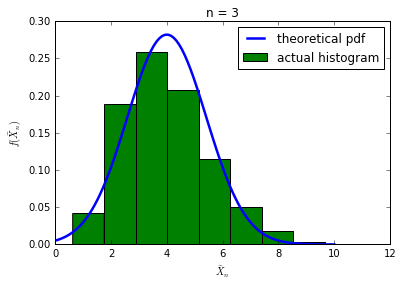

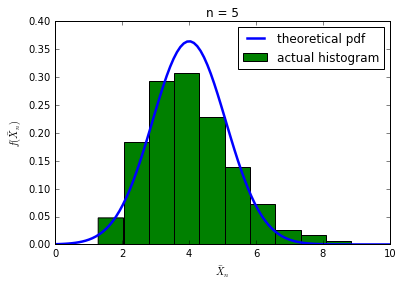

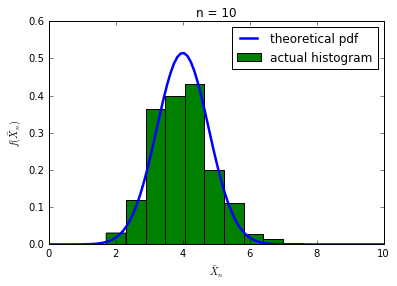

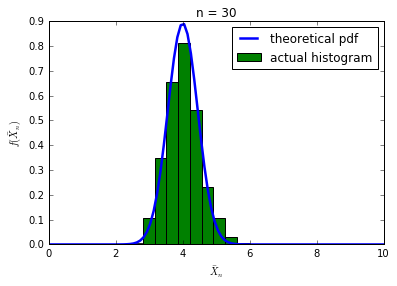

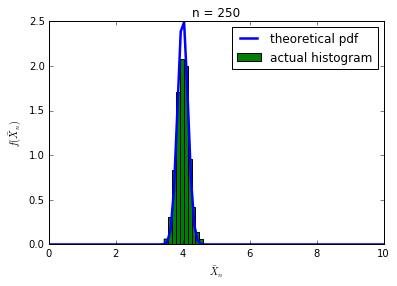

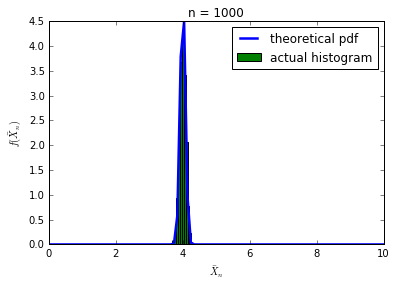

In [167]:

#  
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n: 3, 5, 10, 50, 250, 1000
# 

for n in [3, 5, 10, 30, 250, 1000]:
    gen_pdf(n)

### Вывод: 
Рост количества элементов в выборке n, позволяет лучше приблизить наше распределение к нормальному распределению. При n < 30 распределение имеет сдвиг относительно теоритического нормального, но уже при n=30 распределение выборочных средних достаточно хорошо соответсвует нормальному, хотя все еще не идеально. 
Так же с ростом выборки распределение сужается, уменьшаются квантили и дисперсия.